# سوال ۶ و ۷ تمرین
### آتیه آرمین - ۸۱۰۱۹۷۶۴۸


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## سوال ۶


---


<div dir=rtl>
برای انجام این سوال ابتدا به بررسی عکس های درون دیتاست پرداختم. برای آنکه label عکس ها را مشخص کنیم، به نام عکس ها میتوان نگاه کرد. عکس هایی که ابتدای نام آن ها m است، labelشان manchester و عکس هایی که ابتدای نام آن ها c است، labelشان chelsea است. <br>
بعضی عکس ها هستند که نامی به غیر از این label ها دارند. برای آنکه بتوانیم label آن ها را هم مشخص کنیم، نام آن ها را هم به همان قالب تغییر دادم. </div>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [261]:
!unzip "/content/drive/MyDrive/Q6_Dataset.zip"

Archive:  /content/drive/MyDrive/Q6_Dataset.zip
replace __MACOSX/._Q6_Dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


<div dir=rtl>
پس از unzip کردن فایل لازم است تا عکس های درون دیتاست را بخوانیم. برای این کار از کتابخانه‌ی CV2 استفاده میکنیم. برای آنکه سایز تمامی عکس ها یکسان باشد و دیتای منظم تری داشته باشیم از همین کتاب خانه برای تغییر سایز عکس ها استفاده میکنیم. همزمان با خواندن هر عکس،‌براساس نام آن عکس، label آن عکس را مشخص میکنیم. در اینجا فرض میکنیم که اگر تیم درون عکس manchester بود، label آن ۰ و اگر تیم درون عکس chelsea بود، label آن ۱ است.
</div>


In [262]:
base_folder = '/content/Q6_Dataset/Images'
images = []
labels = []

folder = os.listdir(base_folder)
for im in folder:
  image = cv2.imread(os.path.join(base_folder, im))
  image = cv2.resize(image,(112,112))
  if(im[0] == 'm'):
    labels.append(0)
  else:
    labels.append(1)
  images.append(image)
images = np.array(images)

<div dir=rtl>
پس از خواندن تمامی عکس ها به طبقه بندی بر اساس رنگ عکس ها میپردازیم. برای اینکار با استفاده از کتابخانه CV2 میانگین رنگ در هر عکس را بدست آورده و آن را تبدیل به ۳ کانال رنگی میکنیم. سپس ۲ کانال آبی و قرمز را باهم مقایسه میکنیم. اگر کانال آبی مقدار بیشتری داشت، پس رنگ عکس آبی و عکس در طبقه chelsea قرار میگیرد و label آن ۱ میشود در غیر این صورت عکس در طبقه manchester و label آن ۰ میشود.
</div>


In [263]:
pred_labels = []
for image in images:
  channels = cv2.mean(image)
  observation = np.array([(channels[2], channels[1], channels[0])])
  img_mean = observation[0]
  if(img_mean[2] > img_mean[0]):
    pred_labels.append(1)
    #chelsea
  else:
    pred_labels.append(0)
    #manchester


<div dir=rtl>
حال در این قسمت مقادیر TP، FP، TNو FN را براساس label های پیشبینی شده و label های واقعی، بدست می‌آوریم و مقادیر recall،percision و acurracy را بر اساس فرمول بدست می آوریم.</div>


In [264]:
#chelsea = positive , manchester = negative
TP=0
FP=0
TN=0
FN=0
for i in range(len(pred_labels)):
  if(pred_labels[i] and labels[i]):
    TP += 1
  if(pred_labels[i] and (not labels[i])):
    FP += 1
  if((not pred_labels[i]) and (not labels[i])):
    TN += 1
  if((not pred_labels[i]) and labels[i]):
    FN += 1

recall = TP / labels.count(1)
precision = TP / pred_labels.count(1)
accuracy = (TP + TN) / len(labels)

print(TP,FP,TN,FN)
print('Recall: ' , recall)
print('Precision: ', precision)
print('Accuracy: ', accuracy)

46 1 57 18
Recall:  0.71875
Precision:  0.9787234042553191
Accuracy:  0.8442622950819673



<div dir=rtl>
در این قسمت توسط تابع confusion_metrics نمودار confusion matrix را نمایش داده‌ام.</div>


Text(0.5, -24.143921292465052, 'Predicted label')

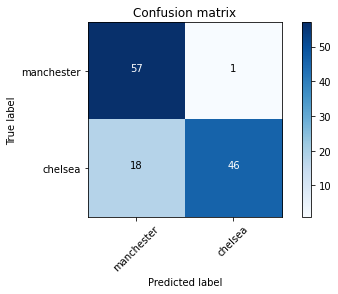

In [265]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import itertools

classes = ['manchester','chelsea']
cm = confusion_matrix(np.array(labels),np.array(pred_labels))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
           horizontalalignment="center",
           color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

##سوال ۷

---

<div dir=rtl>
در این سوال ابتدا توسط کتابخانه pandas شروع به خواندن دیتاست میکنیم. یکی از ستون های این دیتاست مقادیر string دارد که برای آنکه بتوانیم با آن کار کنیم باید مقادیر آن ستون را با اعداد جایگزین کنیم که این کار را با تابع replace انجام میدهیم.
 </div>


In [1]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 1.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp

In [71]:
data = pd.read_csv('/content/Dummy Data HSS.csv')
data.info

<bound method DataFrame.info of       TV      Radio  Social Media Influencer       Sales
0     16   6.566231      2.907983       Mega   54.732757
1     13   9.237765      2.409567       Mega   46.677897
2     41  15.886446      2.913410       Mega  150.177829
3     83  30.020028      6.922304       Mega  298.246340
4     15   8.437408      1.405998      Micro   56.594181
...   ..        ...           ...        ...         ...
4561  26   4.472360      0.717090      Micro   94.685866
4562  71  20.610685      6.545573       Nano  249.101915
4563  44  19.800072      5.096192      Micro  163.631457
4564  71  17.534640      1.940873      Macro  253.610411
4565  42  15.966688      5.046548      Micro  148.202414

[4566 rows x 5 columns]>

In [72]:
y = data['Sales']
X = data.drop(columns='Sales')

In [73]:
X['Influencer'].value_counts()

Mega     1156
Micro    1152
Nano     1137
Macro    1121
Name: Influencer, dtype: int64

In [74]:
X['Influencer'] = X['Influencer'].replace({'Mega':0, 'Micro':1, 'Nano':2, 'Macro':3})
X

,TV,Radio,Social Media,Influencer
0,16,6.566231,2.907983,0
1,13,9.237765,2.409567,0
2,41,15.886446,2.913410,0
3,83,30.020028,6.922304,0
4,15,8.437408,1.405998,1
...,...,...,...,...
4561,26,4.472360,0.717090,1
4562,71,20.610685,6.545573,2
4563,44,19.800072,5.096192,1
4564,71,17.534640,1.940873,3



<div dir=rtl>
حال با تابع standardScaler() مقادیر دیتاست را نرمالایز میکنیم. سپس با تابع train_test_split ابتدا کل دیتاست را به دو دسته‌ی train و test تقسیم میکنیم به این صورت که ۷۰ درصد داده‌ها را train و ۳۰ درصد را test در نظر میگیریم. سپس داده‌های test را به همان صورت به دو دسته‌ی validation و test تقسیم میکنیم. 
</div>


In [75]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(2237, 4)
(959, 4)
(1370, 4)



<div dir=rtl>
حال ابتدا برای fit کردن روی مدل با درجه ۱ از تابع LinearRegression() استفاده میکنیم و آن را روی داده های train، fit کرده و از تابع predict برای پیدا کردن جواب روی دیتا های train و validation استفاده میکنیم. سپس مقدار MSE آن ها را در لیست ارور ها اضافه میکنیم.
</div>


In [76]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
reg.intercept_, reg.coef_

(192.36008357197318,
 array([90.12572298,  2.86474704,  0.11237617, -0.09939347]))

In [78]:
y_train_predict = reg.predict(X_train)
y_val_predict = reg.predict(X_val)
train_mse = mean_squared_error(y_train, y_train_predict)
val_mse = mean_squared_error(y_val, y_val_predict)

train_errors = []
val_errors = []
test_error = []
test_bias = []
test_var = []

train_errors.append(train_mse)
val_errors.append(val_mse)

mse, bias, var = bias_variance_decomp(reg, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
                                    ,loss='mse', random_seed=123)

test_error.append(mse)
test_bias.append(bias)
test_var.append(var)

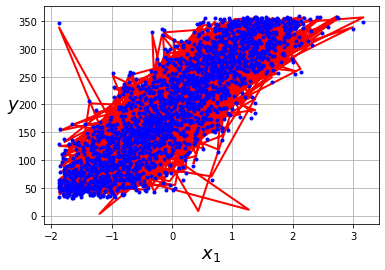

In [79]:
plt.plot(X_train[1], y_train_predict, "r-", linewidth=2)
plt.plot(X_train[1], y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()

In [80]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  X_train_poly = poly_features.fit_transform(X_train)
  X_val_poly = poly_features.fit_transform(X_val)
  X_test_poly = poly_features.fit_transform(X_test)

  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_val_predict = poly_model.predict(X_val_poly)
  train_mse = mean_squared_error(y_train, y_train_predict)
  val_mse = mean_squared_error(y_val, y_val_predict)

  t_mse, t_bias, t_var = bias_variance_decomp(poly_model, np.array(X_train_poly), np.array(y_train), 
                                                       np.array(X_test_poly), np.array(y_test),loss='mse', random_seed=123)

  plt.figure(figsize=(40,5))
  plt.subplot(1,7,degree)

  plt.plot(X_train_poly, y_train_predict, "r-", linewidth=2)
  plt.plot(X_train_poly, y_train, "b.")
  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.title(f"Regression with degree {degree} on train data")
  plt.grid()
  return train_mse, val_mse, t_mse, t_bias, t_var


<div dir=rtl>
سپس به ازای هر درجه از  درجه ۲ تا ۷، ابتدا توسط تابع polynomialFeatures() ویژگی ها را با درجه مورد نظر اضافه میکنیم سپس دوباره با تابع linearRegression دیتا را مانند قبلfit میکنیم. حال تنها کافیست خطا ها را با یک نمودار میله‌ای نشان دهیم. از روی این نمودار میتوان گفت درجه ۳ برای تخمین میزان فروش از بقیه درجه ها بهتر است.
</div>


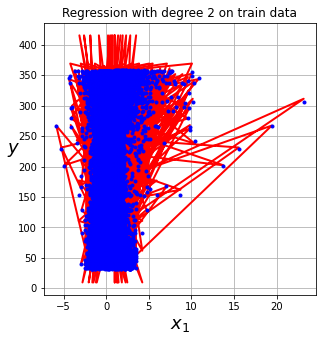

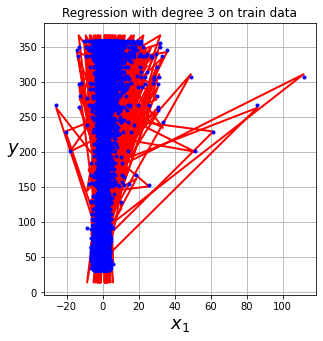

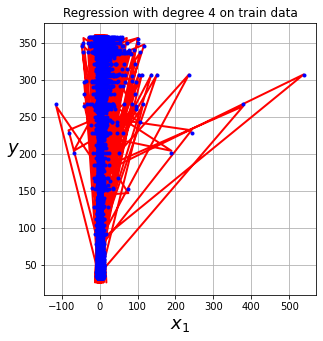

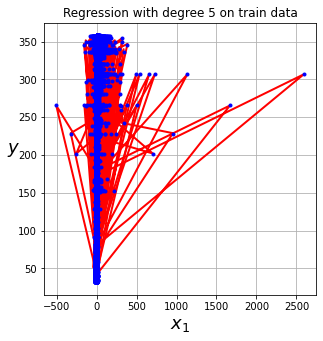

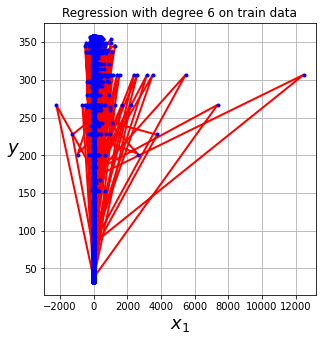

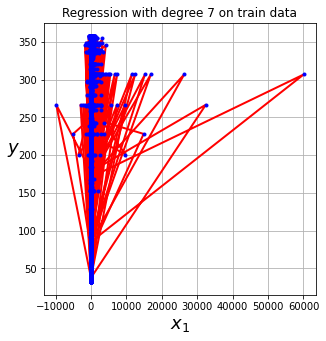

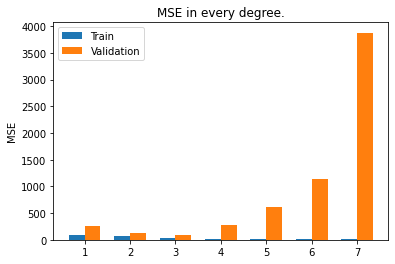

In [81]:
for i in range(2,8):
  train_mse, val_mse, t_mse, t_bias, t_var = create_polynomial_regression_model(i)
  train_errors.append(train_mse)
  val_errors.append(val_mse)    
  test_error.append(t_mse)
  test_bias.append(t_bias)
  test_var.append(t_var)
  plt.show()

width = 0.35
ind = np.arange(len(train_errors))
plt.bar(ind, train_errors, width, label='Train')
plt.bar(ind + width, val_errors, width, label='Validation')

plt.ylabel('MSE')
plt.xticks(ind + width / 2, np.arange(7)+1)
plt.legend(loc='best')
plt.title("MSE in every degree.")
plt.show()


<div dir=rtl>
مرحله بعدی بدست آوردن جواب برای داده های تست روی هر درجه و نشان دادن مقادیر bias، variance و MSE روی یک نمودار برای داده‌های تست است. اینطور که مشخص است،درجه۳ بهتر از بقیه درجه ها عمل کرده است.
</div>


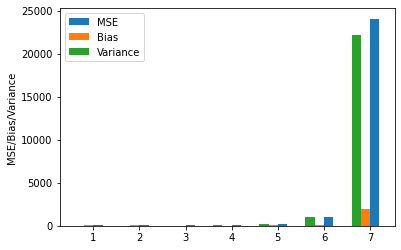

In [83]:
width = 0.2
ind = np.arange(len(train_errors))
plt.bar(ind+ width, test_error, width, label='MSE')
plt.bar(ind, test_bias, width, label='Bias')
plt.bar(ind - width, test_var, width, label='Variance')

plt.ylabel('MSE/Bias/Variance')
plt.xticks(ind + width / 2, np.arange(7)+1)
plt.legend(loc='best')
plt.show()